# Black Friday Dataset

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df = pd.read_csv('datasets/Black Friday/black_friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.shape

(550068, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df.drop(columns=['User_ID', 'Product_ID'], inplace=True)

In [10]:
df['Gender'] = df['Gender'].replace({'F': 1, 'M': 0})
df.rename(columns={'Gender': 'Female'}, inplace=True)

In [11]:
age_cats = np.sort(df['Age'].unique())
stay_cats = np.sort(df['Stay_In_Current_City_Years'].unique())
age_cats, stay_cats

(array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
       dtype=object),
 array(['0', '1', '2', '3', '4+'], dtype=object))

In [12]:
age_encoder = OrdinalEncoder(categories=[age_cats])
stay_encoder = OrdinalEncoder(categories=[stay_cats])
df['Age'] = age_encoder.fit_transform(df[['Age']])
df['Stay_In_Current_City_Years'] = stay_encoder.fit_transform(df[['Stay_In_Current_City_Years']])

In [13]:
df.head()

,Female,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0.0,10,A,2.0,0,3,NaN,NaN,8370
1,1,0.0,10,A,2.0,0,1,6.0,14.0,15200
2,1,0.0,10,A,2.0,0,12,NaN,NaN,1422
3,1,0.0,10,A,2.0,0,12,14.0,NaN,1057
4,0,6.0,16,C,4.0,0,8,NaN,NaN,7969


In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
city_cats = pd.get_dummies(df['City_Category'], drop_first=True).astype(int)
city_cats

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [16]:
df = pd.concat([df, city_cats], axis=1)
df.drop(columns='City_Category', inplace=True)
df.head()

,Female,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,0.0,10,2.0,0,3,NaN,NaN,8370,0,0
1,1,0.0,10,2.0,0,1,6.0,14.0,15200,0,0
2,1,0.0,10,2.0,0,12,NaN,NaN,1422,0,0
3,1,0.0,10,2.0,0,12,14.0,NaN,1057,0,0
4,0,6.0,16,4.0,0,8,NaN,NaN,7969,0,1


### Replacing NaN values with mode

In [17]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)
df.head()

,Female,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,0.0,10,2.0,0,3,8.0,16.0,8370,0,0
1,1,0.0,10,2.0,0,1,6.0,14.0,15200,0,0
2,1,0.0,10,2.0,0,12,8.0,16.0,1422,0,0
3,1,0.0,10,2.0,0,12,14.0,16.0,1057,0,0
4,0,6.0,16,4.0,0,8,8.0,16.0,7969,0,1


In [18]:
df.isna().sum()

Female                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

### Checking Correlation

<Axes: >

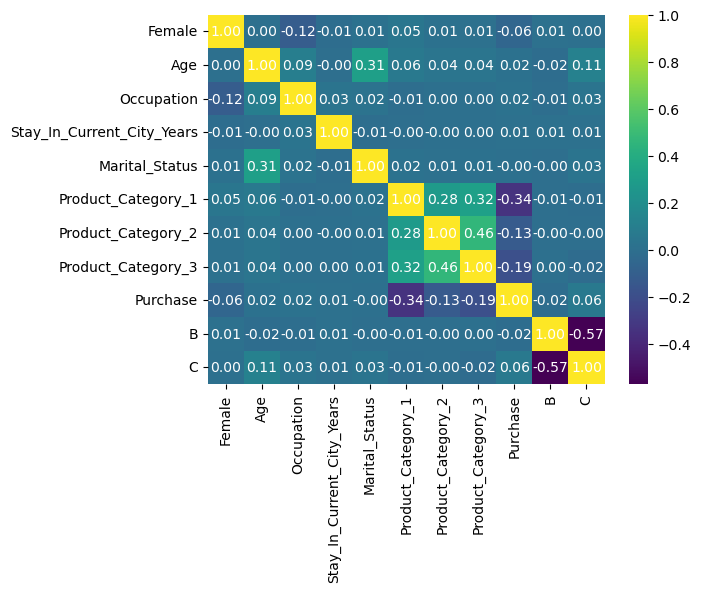

In [20]:
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 10, "color": "white"})

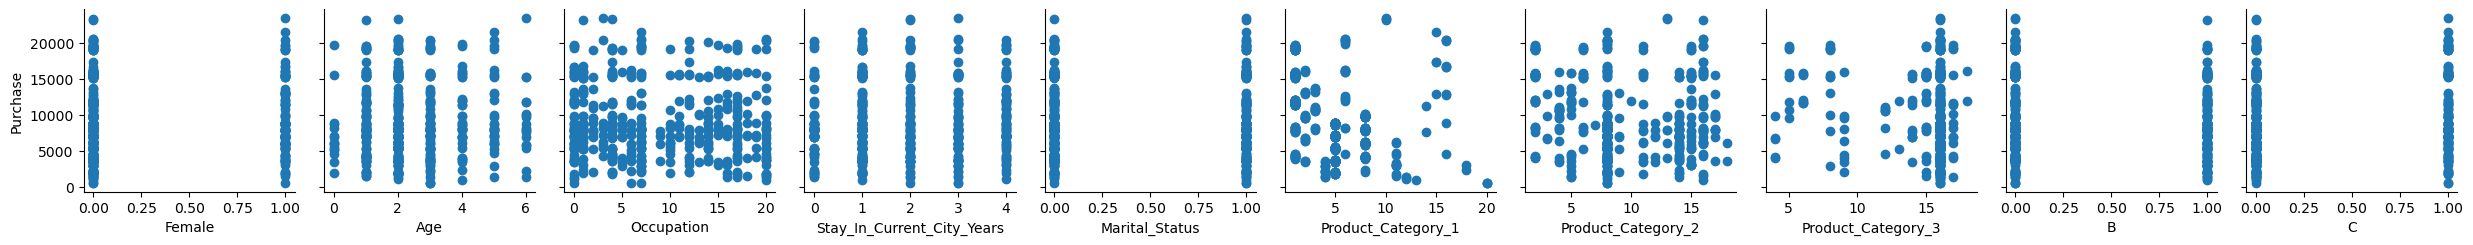

In [87]:
random_df = df.sample(n=500, random_state=42)
grid = sns.PairGrid(data=random_df, y_vars=['Purchase'], x_vars=random_df.columns.drop(labels='Purchase'))
grid.map(plt.scatter)